In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Домашнее задание 4   
## Задача 1  
+ Постройте график
+ Назовите график
+ Сделайте именование оси x и оси y
+ Сделайте выводы 
### 1.1  

In [2]:
df =pd.read_csv('..\kc_house_data.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимость недвижимости

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

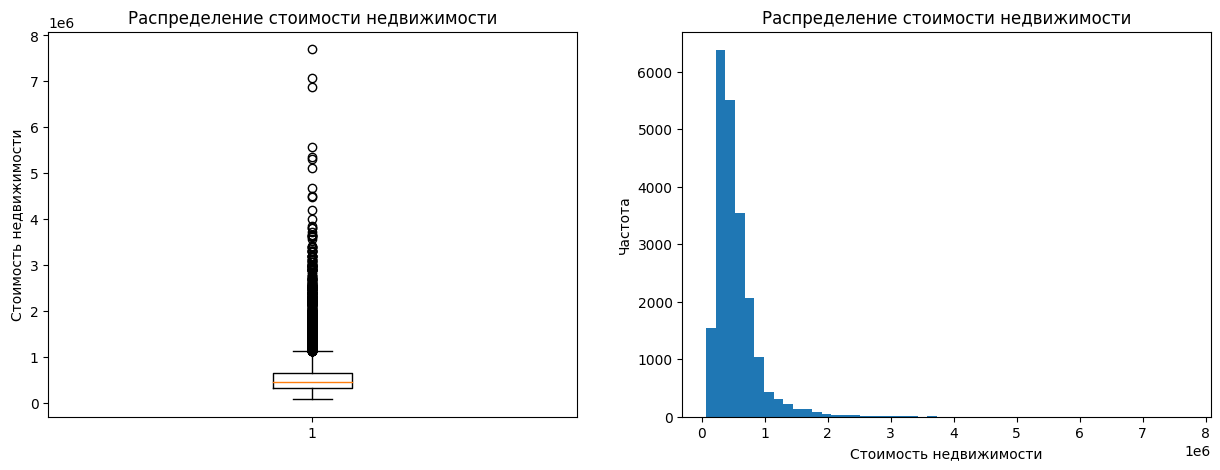

6.778327858233471

In [3]:
display(df['price'].describe())
graf = plt.figure(figsize=[15,5])
graf_1 = graf.add_subplot(1,2,1)
graf_1.set(ylabel='Стоимость недвижимости', title='Распределение стоимости недвижимости')
graf_1.boxplot(df['price'])
graf_2 = graf.add_subplot(1,2,2)
graf_2.hist(df['price'], bins=50)
graf_2.set(xlabel='Стоимость недвижимости', ylabel='Частота', title='Распределение стоимости недвижимости')
plt.show()
display(df[df['price'] > 1000000].shape[0] / df.shape[0] * 100)

Стоимость большинства обЪектов недвижимости, меньше 1го миллиона.  
На продажи свыше 1го милионна приходится 6,77%

### 1.3 Изучите распределение квадратуры жилой площади

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

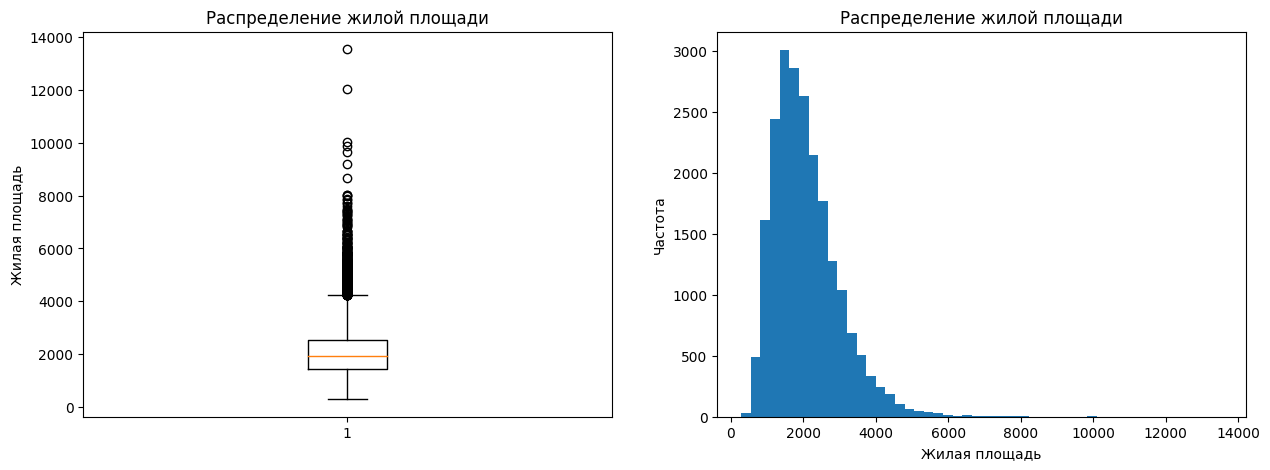

0.5552213945310693

In [4]:
display(df['sqft_living'].describe())
graf = plt.figure(figsize=[15,5])
graf_1 = graf.add_subplot(1,2,1)
graf_1.set(ylabel='Жилая площадь', title='Распределение жилой площади')
graf_1.boxplot(df['sqft_living'])
graf_2 = graf.add_subplot(1,2,2)
graf_2.hist(df['sqft_living'], bins=50)
graf_2.set(xlabel='Жилая площадь', ylabel='Частота', title='Распределение жилой площади')
plt.show()
display(df[df['sqft_living'] > 5500].shape[0] / df.shape[0] * 100)

Наибольшей популярностью пользуются квартиры площадью около 2000ft

### 1.4 Изучите распределение года постройки

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

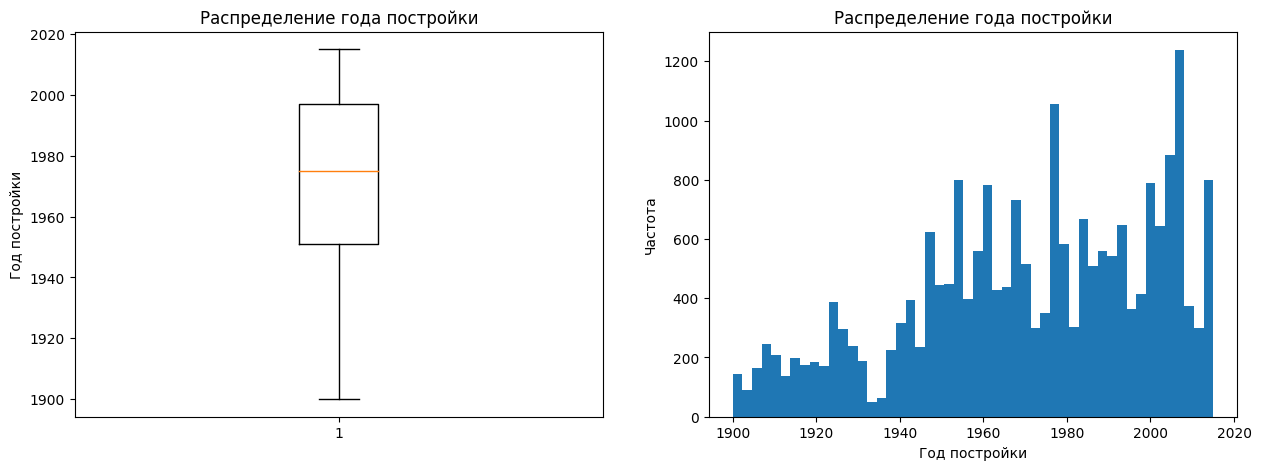

In [5]:
display(df['yr_built'].describe())
graf = plt.figure(figsize=[15,5])
graf_1 = graf.add_subplot(1,2,1)
graf_1.set(ylabel='Год постройки', title='Распределение года постройки')
graf_1.boxplot(df['yr_built'])
graf_2 = graf.add_subplot(1,2,2)
graf_2.hist(df['yr_built'], bins=50)
graf_2.set(xlabel='Год постройки', ylabel='Частота', title='Распределение года постройки')
plt.show()

## Задача 2
### 2.1 Изучите распределение домов от наличия вида на набережную

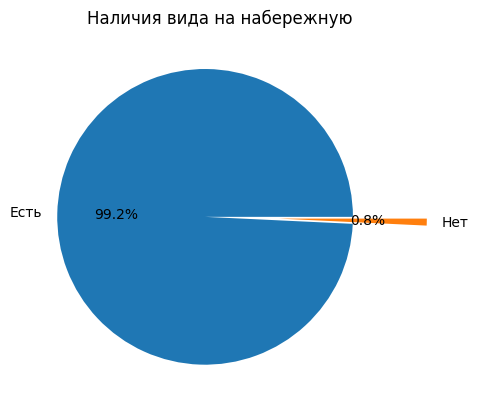

In [6]:
plt.title('Наличия вида на набережную')
plt.pie(df['waterfront'].value_counts(),
        explode=[0.1,0.4],
        labels=['Есть', 'Нет'],        
        autopct='%1.1f%%');


Большинство домов не имеют вида на набережную.

### 2.2 Изучите распределение этажей домов



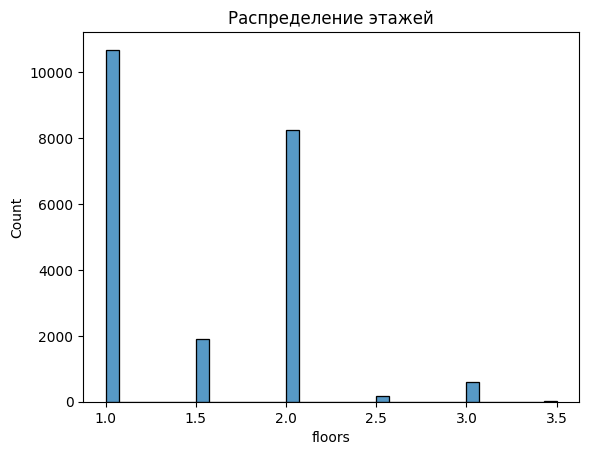

In [7]:
sns.histplot(df['floors']).set(title='Распределение этажей');

Более популярны 1 и 2 этажи

### 2.3 Изучите распределение состояния домов

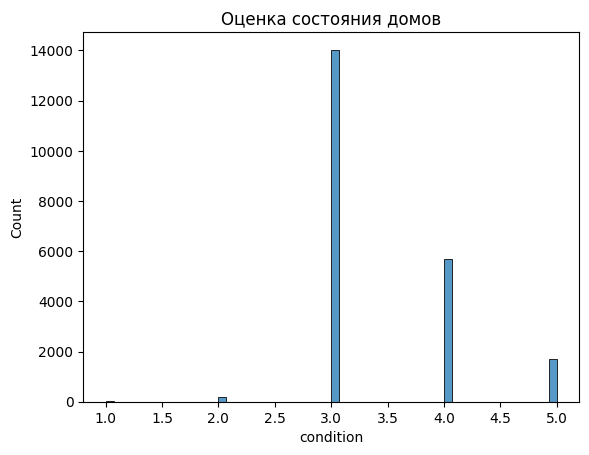

In [8]:
sns.histplot(df['condition']).set(title='Оценка состояния домов');

Наиболее популярны дома со средней оценкой состояния.  
Дома снизкой оценкой практически не продаются

## Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

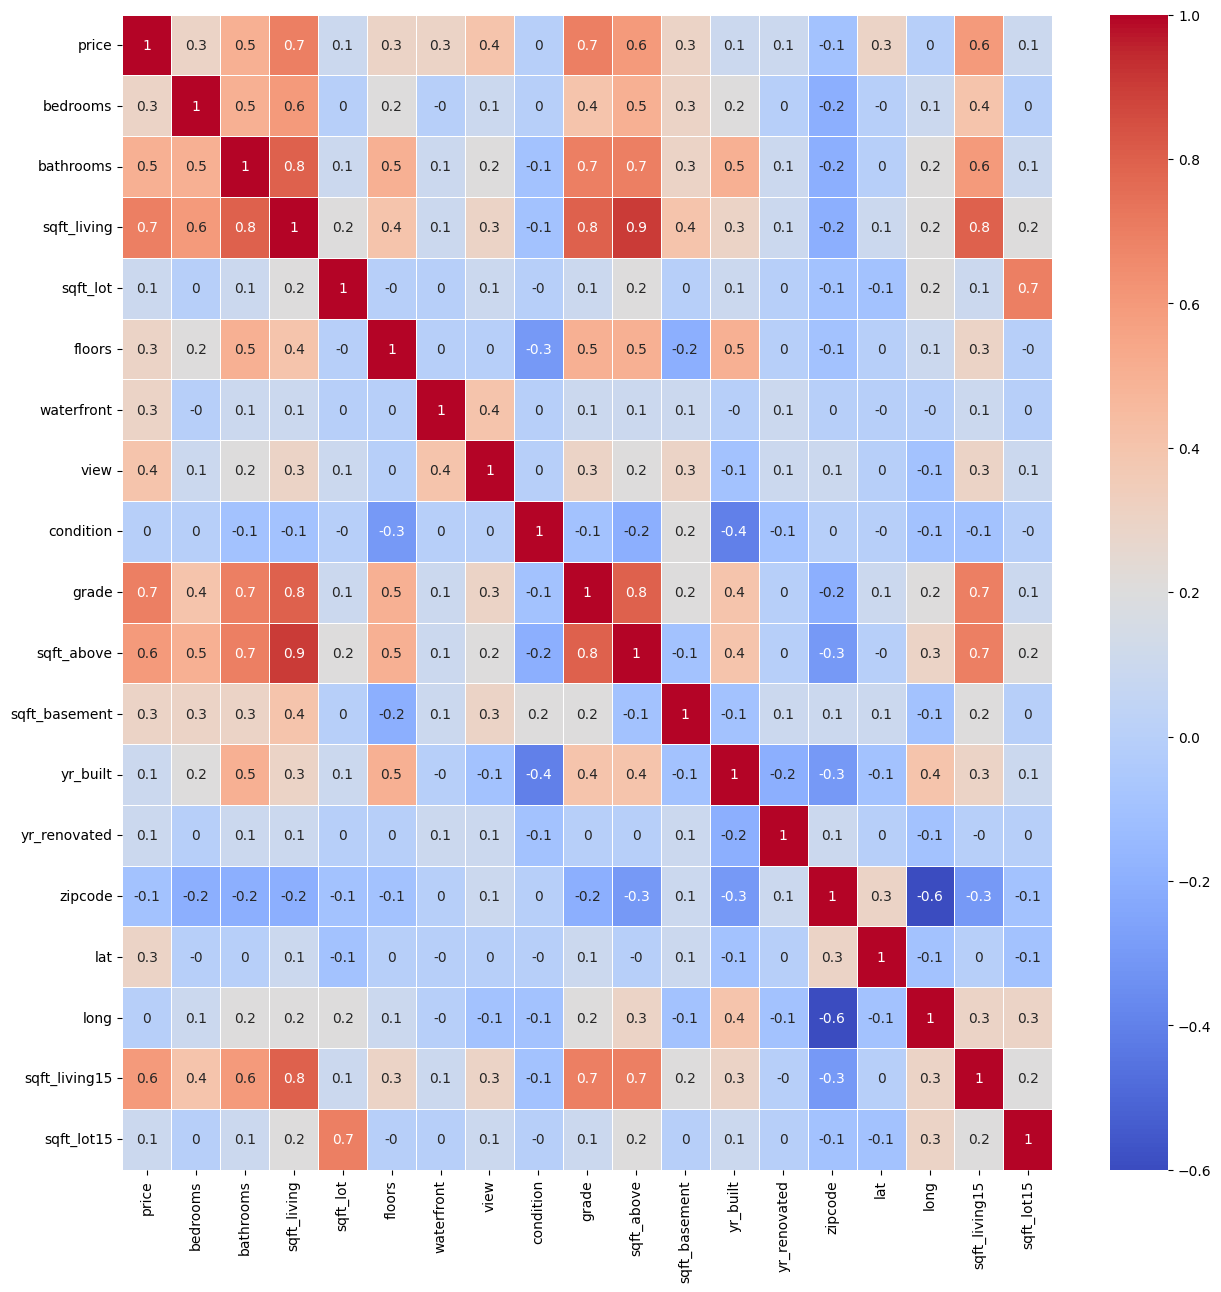

In [11]:
plt.figure(figsize=[15,15])
sns.heatmap(df.drop(columns=['id','date']).corr().round(1), annot=True, linewidths=.5, cmap='coolwarm');

На стоимость влияют:  
- Кол-во ванных комнат(0.5)  
- Жилая площадь(0.7)  
- Класс жилья(0.7)
- Площадь дома без подвала(0.6)
- От изменения жилой площади после ремонта в 2015г(0.6)

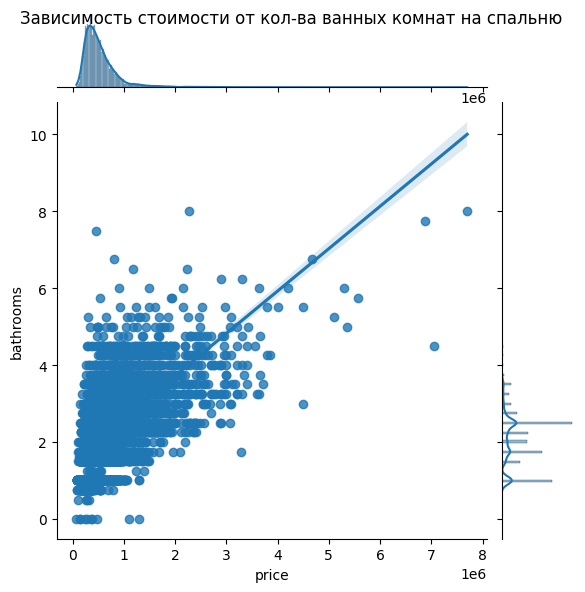

In [10]:

sns.jointplot(x= df['price'],y =df['bathrooms'],kind='reg').fig.suptitle('Зависимость стоимости от кол-ва ванных комнат на спальню');


Просматривается прямая зависимость

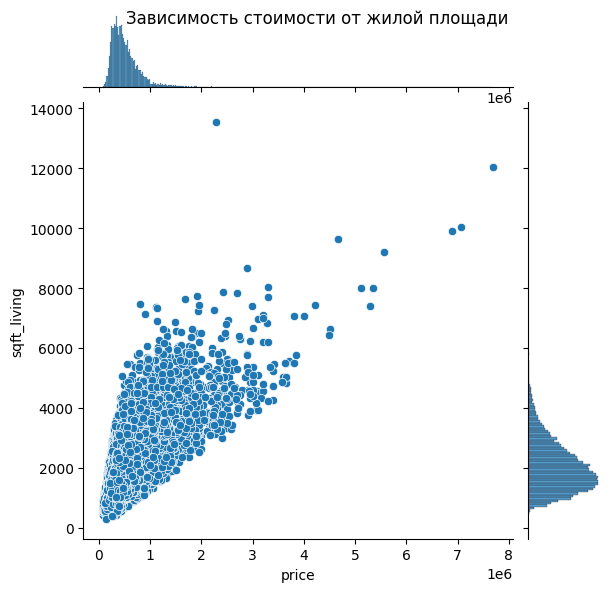

In [25]:
sns.jointplot(x= df['price'],y =df['sqft_living']).fig.suptitle('Зависимость стоимости от жилой площади');


Также просматриваеся прямая зависимость стоимости от жилой площяди

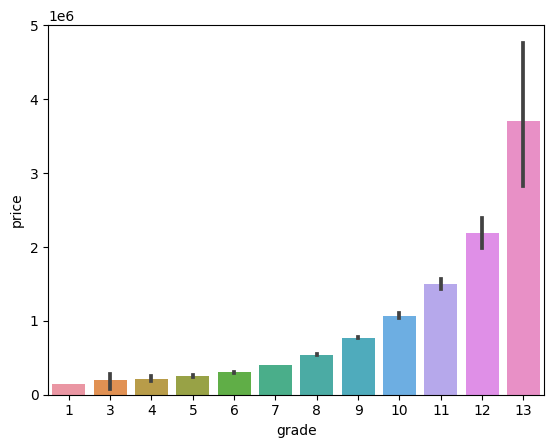

In [66]:
sns.barplot(x=df['grade'], y=df['price']);    

Чем выше оценка тем выше стоимость жилья

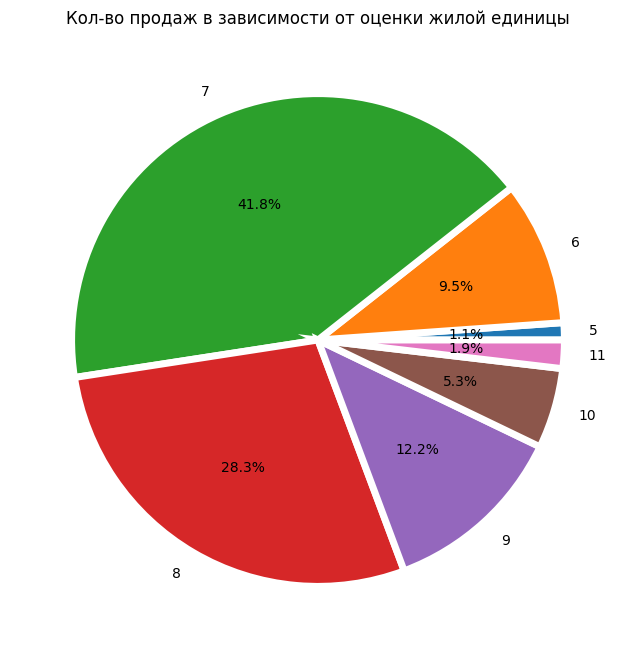

In [92]:
plt.figure(figsize=(8, 8))
d = df.groupby('grade').agg({"price": "count"})
d = d[d['price'] > 200]
plt.title('Кол-во продаж в зависимости от оценки жилой единицы')
plt.pie(d['price'],
        labels=d.index,
        autopct='%1.1f%%',
        wedgeprops={ 'linewidth' : 5, 'edgecolor' : 'white' }
        );

Наиболее продаваемо, жилье 7 и 8 класса